#Double 7's (Short Term Trading Strategies that Work)

In [1]:
%matplotlib inline

Use future imports for python 3.0 forward compatibility

In [2]:
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

Other imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *
import pinkfish as pf
import doubles

# format price data
pd.options.display.float_format = '{:0.2f}'.format

# Double the DPI, so we are making 2x plots:
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Some global data

In [4]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
#end = datetime.datetime(2005, 12, 1)
end = datetime.datetime.now()

Define high low trade periods

In [5]:
periods = range(3, 16)
periods = [str(period) for period in periods]

Run Strategy

In [6]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = doubles.Doubles(symbol, capital, start, end, int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].stats()

3 4 5 6 7 8 9 10 11 12 13 14 15 

Summarize results

In [7]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades')

df = doubles.summary(strategies, *metrics)
df

,3,4,5,6,7,8,9,10,11,12,13,14,15
annual_return_rate,5.34,6.67,6.60,7.63,8.04,8.15,7.51,6.97,7.37,7.13,6.50,5.44,5.71
max_closed_out_drawdown,-16.98,-15.78,-14.04,-14.02,-14.63,-15.79,-15.38,-15.00,-14.97,-16.57,-18.13,-17.34,-17.39
drawdown_annualized_return,-3.18,-2.36,-2.13,-1.84,-1.82,-1.94,-2.05,-2.15,-2.03,-2.32,-2.79,-3.19,-3.05
drawdown_recovery,-0.91,-0.05,-0.05,-0.05,-1.84,-1.84,-1.66,-1.66,-1.66,-0.05,-1.28,-0.19,-0.19
best_month,12.09,11.04,10.05,10.05,12.88,12.85,13.27,10.71,10.70,10.72,10.72,10.71,11.35
worst_month,-15.62,-15.29,-13.55,-13.53,-13.54,-12.29,-13.73,-13.72,-13.70,-16.28,-16.28,-13.97,-14.03
sharpe_ratio,0.59,0.72,0.72,0.81,0.83,0.85,0.81,0.75,0.78,0.74,0.67,0.58,0.61
sortino_ratio,0.42,0.53,0.52,0.60,0.63,0.64,0.58,0.55,0.57,0.53,0.49,0.41,0.43
monthly_std,2.13,1.99,1.95,1.98,2.10,2.15,2.03,2.02,2.08,2.14,2.20,2.10,2.04
pct_time_in_market,41.75,37.94,35.86,34.09,33.52,32.23,30.07,30.31,30.05,30.25,30.38,29.30,28.24


Bar graphs

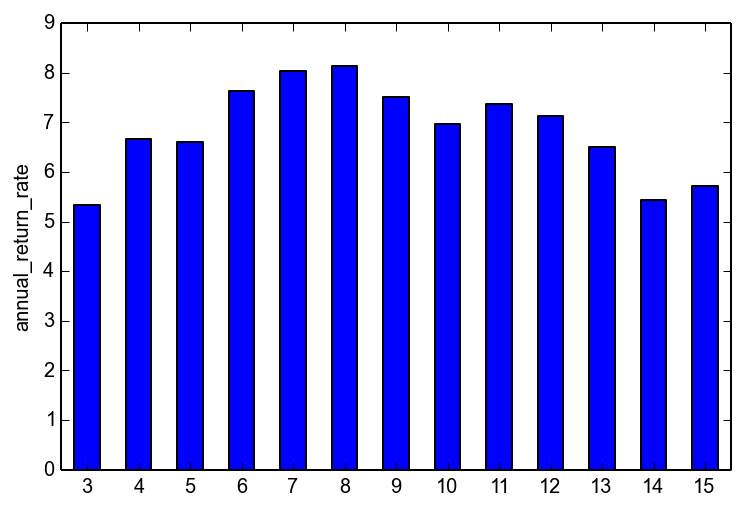

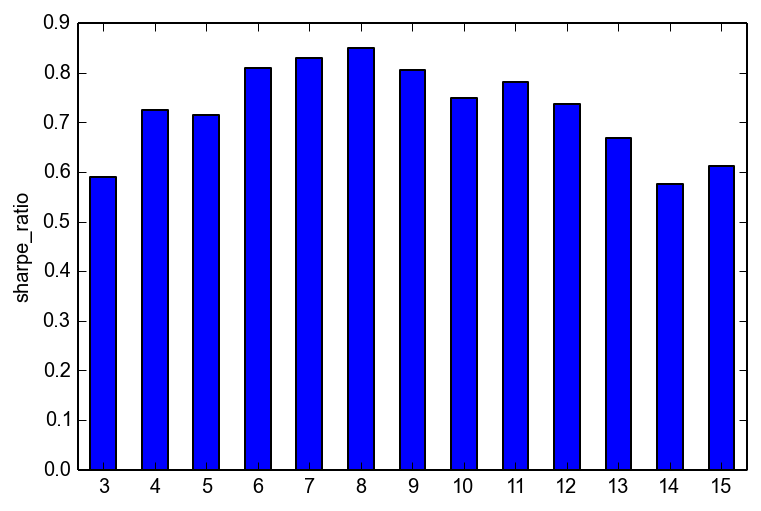

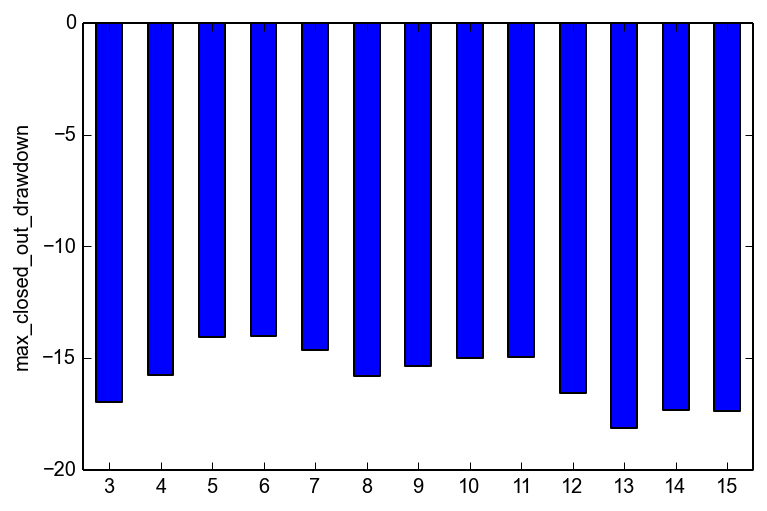

In [8]:
doubles.plot_bar_graph(df, 'annual_return_rate')
doubles.plot_bar_graph(df, 'sharpe_ratio')
doubles.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [9]:
benchmark = pf.Benchmark(symbol, capital, start, end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.stats()

1993-01-29 00:00:00 BUY  345 SPY @ 28.92
2015-07-10 00:00:00 SELL 345.0 SPY @ 207.48


Equity curve

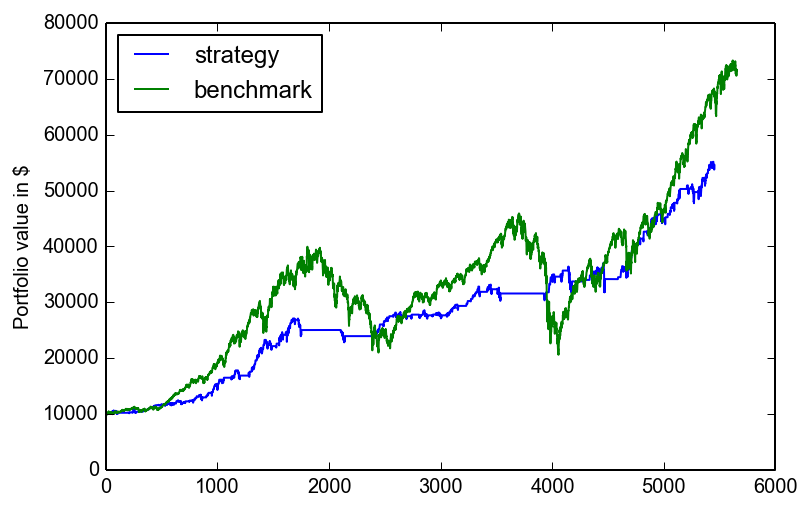

In [10]:
pf.plot_equity_curve(strategies['8'].dbal, benchmark=benchmark.dbal)